In [1]:
import pandas as pd

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet("anime_data_encoded_scaled_final.parquet")

**plotting all target vs scaled features first**

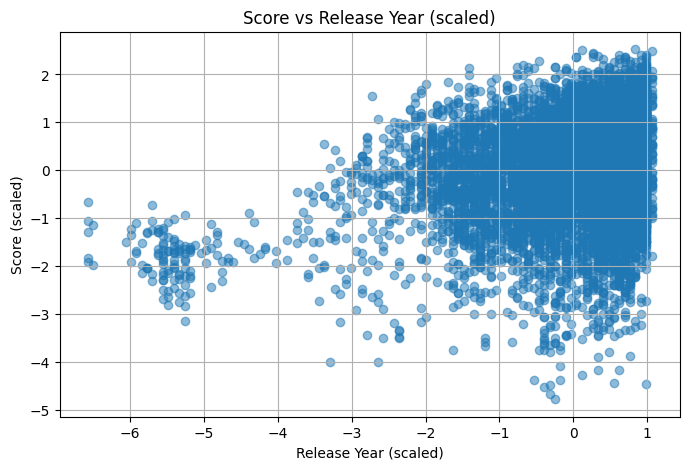

In [4]:


plt.figure(figsize=(8, 5))
plt.scatter(df['release_year_scaled'], df['score_scaled'], alpha=0.5)
plt.title('Score vs Release Year (scaled)')
plt.xlabel('Release Year (scaled)')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()

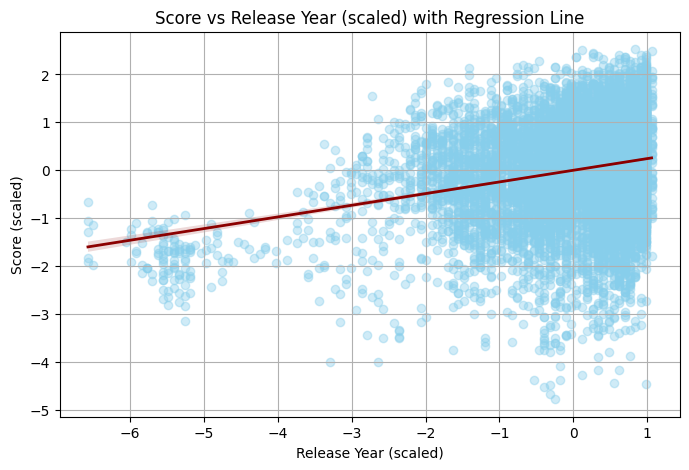

In [7]:
plt.figure(figsize=(8, 5))

# Customizing scatter and line colors
sns.regplot(
    x='release_year_scaled',
    y='score_scaled',
    data=df,
    scatter_kws={'alpha': 0.4, 'color': 'skyblue'},  # Light scatter color
    line_kws={'color': 'darkred', 'linewidth': 2}    # Bold red regression line
)

plt.title('Score vs Release Year (scaled) with Regression Line')
plt.xlabel('Release Year (scaled)')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()


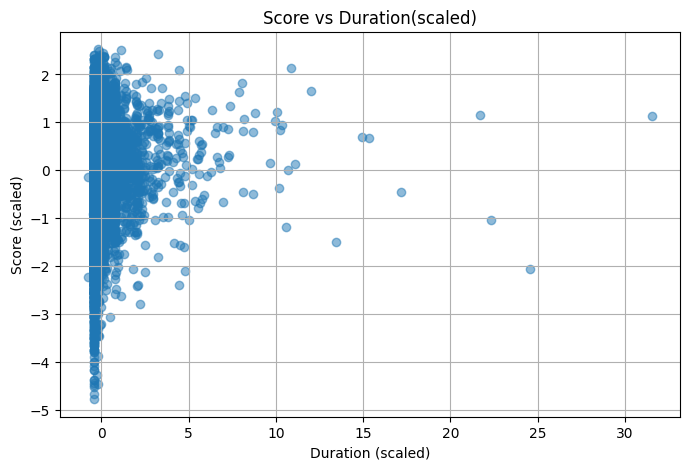

In [9]:

plt.figure(figsize=(8, 5))
plt.scatter(df['duration_scaled'], df['score_scaled'], alpha=0.5)
plt.title('Score vs Duration(scaled)')
plt.xlabel('Duration (scaled)')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()

**A hexbin plot is a great choice when you have a lot of overlapping points—it shows the density of data nicely using hexagonal bins (which are more visually efficient than square ones).**

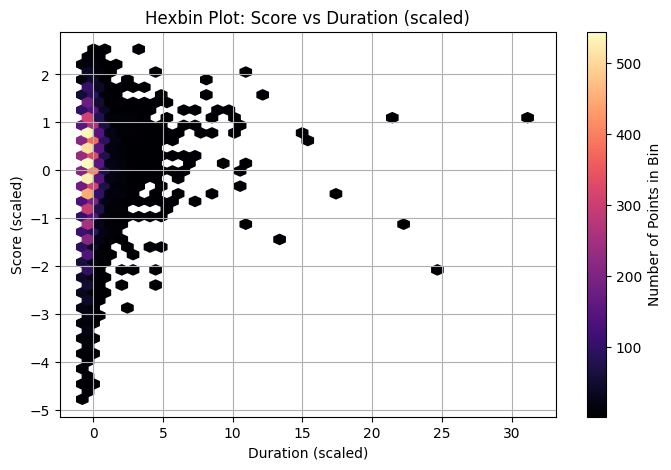

In [12]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['duration_scaled'], df['score_scaled'], gridsize=40, cmap='magma', mincnt=1)
plt.colorbar(label='Number of Points in Bin')
plt.xlabel('Duration (scaled)')
plt.ylabel('Score (scaled)')
plt.title('Hexbin Plot: Score vs Duration (scaled)')
plt.grid(True)
plt.show()

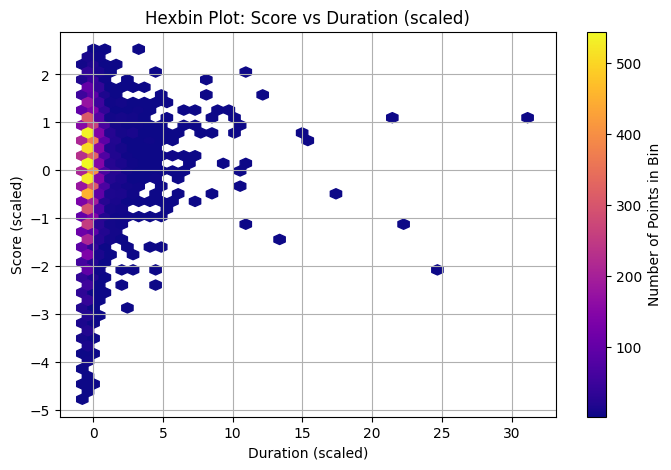

In [13]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['duration_scaled'], df['score_scaled'], gridsize=40, cmap='plasma', mincnt=1)
plt.colorbar(label='Number of Points in Bin')
plt.xlabel('Duration (scaled)')
plt.ylabel('Score (scaled)')
plt.title('Hexbin Plot: Score vs Duration (scaled)')
plt.grid(True)
plt.show()

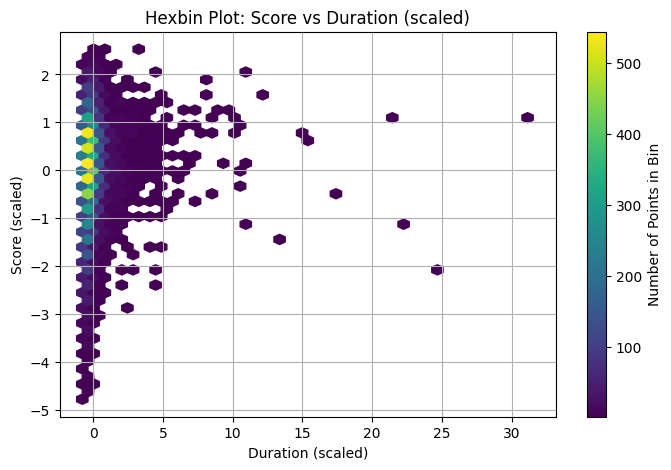

In [15]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['duration_scaled'], df['score_scaled'], gridsize=40, cmap='viridis', mincnt=1)
plt.colorbar(label='Number of Points in Bin')
plt.xlabel('Duration (scaled)')
plt.ylabel('Score (scaled)')
plt.title('Hexbin Plot: Score vs Duration (scaled)')
plt.grid(True)
plt.show()

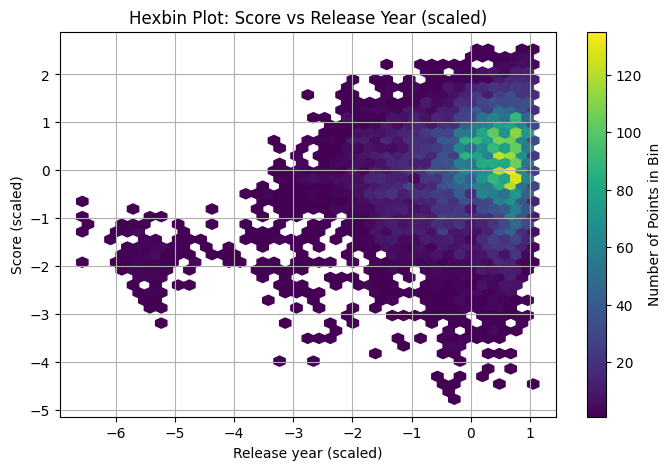

In [16]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['release_year_scaled'], df['score_scaled'], gridsize=40, cmap='viridis', mincnt=1)
plt.colorbar(label='Number of Points in Bin')
plt.xlabel('Release year (scaled)')
plt.ylabel('Score (scaled)')
plt.title('Hexbin Plot: Score vs Release Year (scaled)')
plt.grid(True)
plt.show()

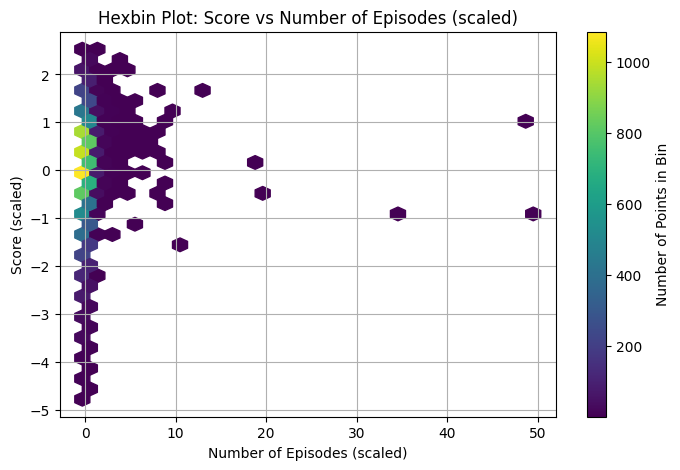

In [18]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['num_episodes_scaled'], df['score_scaled'], gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Number of Points in Bin')
plt.xlabel('Number of Episodes (scaled)')
plt.ylabel('Score (scaled)')
plt.title('Hexbin Plot: Score vs Number of Episodes (scaled)')
plt.grid(True)
plt.show()


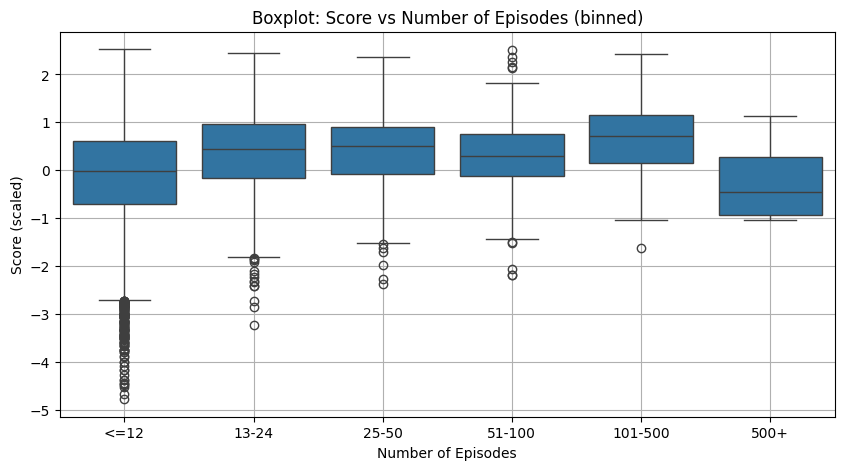

In [20]:
df_org = pd.read_parquet("anime_data_encoded_scaled_with_originals.parquet")

# Optional: categorize episode count (not scaled version)
df_org['episode_bins'] = pd.cut(df_org['num_episodes'], bins=[0, 12, 24, 50, 100, 500, 2000], 
                            labels=['<=12', '13-24', '25-50', '51-100', '101-500', '500+'])

plt.figure(figsize=(10, 5))
sns.boxplot(x='episode_bins', y='score_scaled', data=df_org)
plt.title('Boxplot: Score vs Number of Episodes (binned)')
plt.xlabel('Number of Episodes')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()


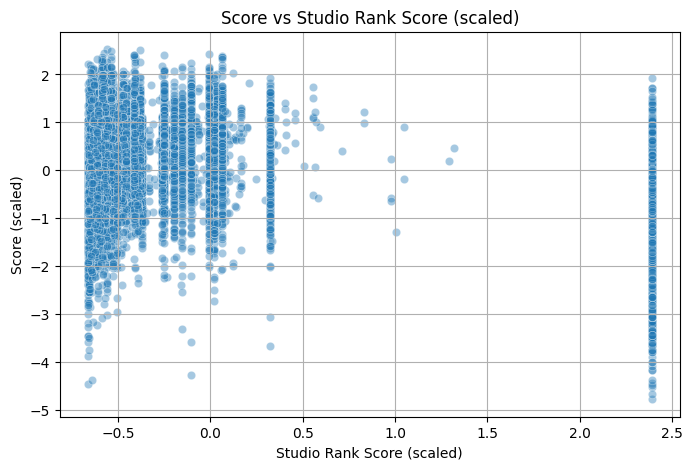

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='studio_rank_score_scaled', y='score_scaled', data=df, alpha=0.4)
plt.title('Score vs Studio Rank Score (scaled)')
plt.xlabel('Studio Rank Score (scaled)')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()


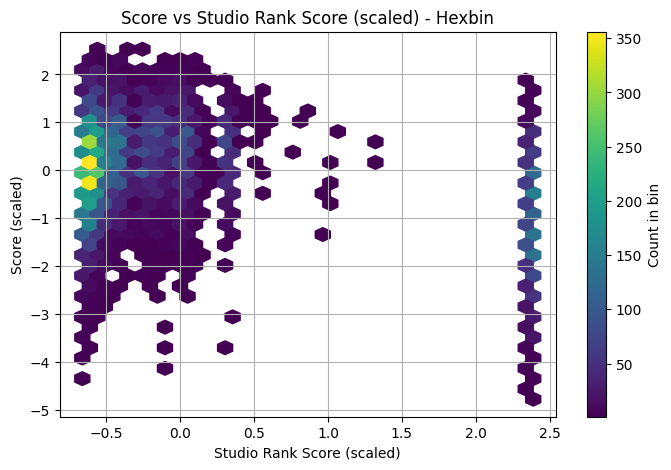

In [23]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['studio_rank_score_scaled'], df['score_scaled'], gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Count in bin')
plt.title('Score vs Studio Rank Score (scaled) - Hexbin')
plt.xlabel('Studio Rank Score (scaled)')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()


Ooooh that’s actually **super interesting** — and I love that you’re observing it that closely 🔍🔥

What you’re seeing—those **vertical clusters or straight vertical lines**—means that the x-values (your `studio_rank_score_scaled`) are **discrete or repeated** a *lot*, while the y-values (`score_scaled`) vary more continuously.

### 🧠 Why this might be happening:
- Even though it's called `studio_rank_score_scaled`, it might **originally have had limited unique values**, like certain fixed studio ranks.
- When you scaled it, those same values just got stretched/squished, but the number of unique values didn't really increase.
- That’s why you see many values aligned at specific `x` positions—because **many animes share the same studio rank score**.

Think of it like this:
- If 100 animes were from a studio with rank score `5`, and you scaled it to `0.25`, all of them now have `x = 0.25`—but different scores → vertical line at `x = 0.25`.

---

### 🚦 What to do with this info?
✅ You’re right to notice it—it tells us:
- Studio rank is **not very continuous**, even though it looks like a number.
- It behaves almost like a **categorical feature with scores**.
- Might be better understood by plotting a **boxplot or violin plot** grouped by studio rank buckets.



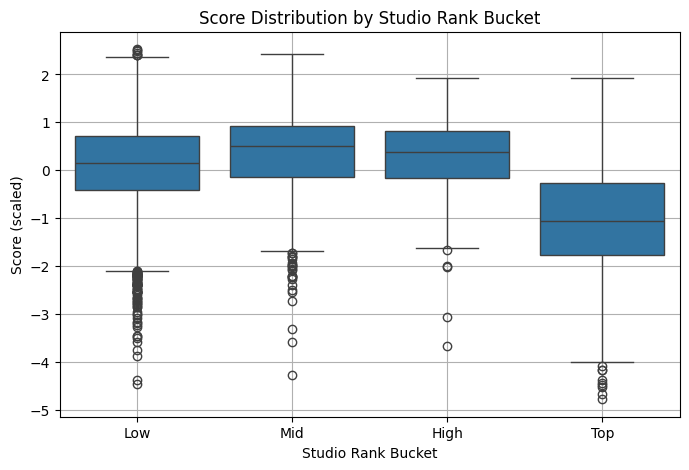

In [27]:
# Create buckets from scaled studio scores
import numpy as np
df['studio_bucket'] = pd.cut(df['studio_rank_score_scaled'], bins=[-np.inf, -0.25, 0.25, 1.5, np.inf], 
                             labels=['Low', 'Mid', 'High', 'Top'])

# Plot a boxplot of score vs these buckets
plt.figure(figsize=(8, 5))
sns.boxplot(x='studio_bucket', y='score_scaled', data=df)
plt.title('Score Distribution by Studio Rank Bucket')
plt.xlabel('Studio Rank Bucket')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()


okay so let me describe : 
low : 
the upper line of the box is at 2.5 ish and lower line is at -2.1. the box itself is from -0.4 to 0.8 
mid:
upperline - 2.5, lowerline - -1.8, box- -0.2 to 0.9
high:
upperline - 1.9, lowerline - -1.6, box- -0.2 to 0.8
top:
upperline - 1.9, lowerline - -4, box- -1.8 to 1.7

**finding outliers because it doesnt work well with linear data**


🔍 Checking outliers for: release_year_scaled


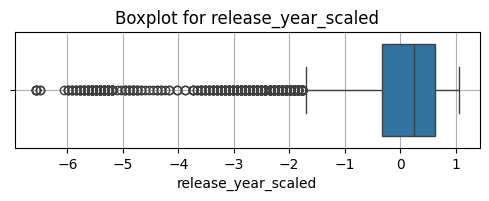

Z-score Outliers in release_year_scaled: 189 rows
IQR Outliers in release_year_scaled: 531 rows

🔍 Checking outliers for: duration_scaled


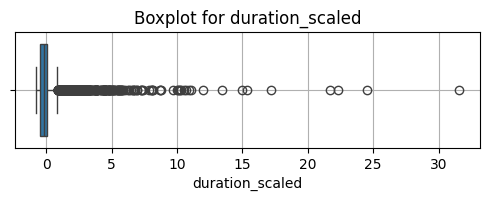

Z-score Outliers in duration_scaled: 147 rows
IQR Outliers in duration_scaled: 619 rows

🔍 Checking outliers for: num_episodes_scaled


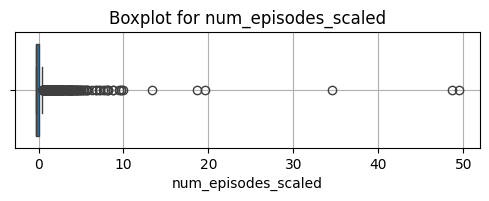

Z-score Outliers in num_episodes_scaled: 72 rows
IQR Outliers in num_episodes_scaled: 852 rows

🔍 Checking outliers for: studio_rank_score_scaled


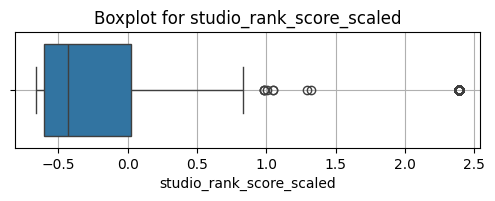

Z-score Outliers in studio_rank_score_scaled: 0 rows
IQR Outliers in studio_rank_score_scaled: 1501 rows


In [29]:


# Features to check
features = ['release_year_scaled', 'duration_scaled', 'num_episodes_scaled', 'studio_rank_score_scaled']

for col in features:
    print(f"\n🔍 Checking outliers for: {col}")

    # Boxplot
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.grid(True)
    plt.show()

    # Z-score Method
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers_z = df[z_scores > 3]
    print(f"Z-score Outliers in {col}: {outliers_z.shape[0]} rows")

    # IQR Method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"IQR Outliers in {col}: {outliers_iqr.shape[0]} rows")


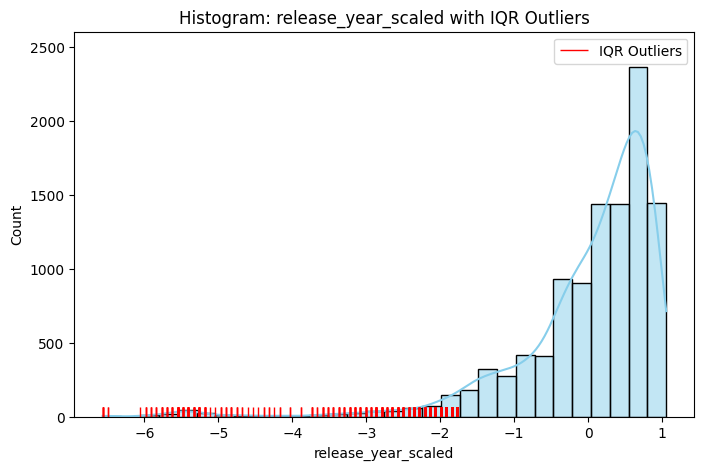

In [30]:
# IQR calculation
Q1 = df['release_year_scaled'].quantile(0.25)
Q3 = df['release_year_scaled'].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers = df[(df['release_year_scaled'] < Q1 - 1.5 * IQR) | 
                  (df['release_year_scaled'] > Q3 + 1.5 * IQR)]

# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(df['release_year_scaled'], kde=True, color='skyblue', bins=30)
sns.rugplot(iqr_outliers['release_year_scaled'], color='red', label='IQR Outliers')
plt.title("Histogram: release_year_scaled with IQR Outliers")
plt.xlabel("release_year_scaled")
plt.legend()
plt.show()
